## Mental Health Crisis Prediction From Non Clinical Data 

#### Import Liabraries 

In [42]:
# Import Liabraries 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

#### 📥 2. Load Dataset

In [43]:
# Load Dataset
df = pd.read_csv("mental_health_crisis_dataset_100000_rows.csv")
df

,age,gender,sleep_hours,sleep_quality,social_interaction_days,living_alone,work_hours_weekly,work_stress_level,physical_activity_days,screen_time_hours,family_support_score,therapy_access,mood_swing_frequency,appetite_changes,crisis_risk
0,43,0,8.2,3,4,1,34,3,0,8.1,1,0,4,1,1
1,51,1,4.1,5,6,1,52,1,4,8.1,3,0,0,1,0
2,51,0,5.9,4,1,1,53,6,3,8.9,2,1,0,0,1
3,82,0,3.9,5,3,0,66,10,6,10.9,5,0,6,1,1
4,26,1,7.8,5,5,1,48,7,3,9.6,4,1,6,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,70,0,5.1,4,7,0,72,1,0,4.1,5,0,6,0,1
99996,60,1,5.5,5,3,1,46,4,6,9.8,3,1,2,0,0
99997,62,1,7.3,2,5,0,61,1,5,5.8,5,0,2,3,1
99998,55,0,5.9,1,5,0,41,3,2,5.0,3,0,3,0,0


In [44]:
# Shape
df.shape

(100000, 15)

#### 🔎 3. EDA (Exploratory Data Analysis)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age                      100000 non-null  int64  
 1   gender                   100000 non-null  int64  
 2   sleep_hours              100000 non-null  float64
 3   sleep_quality            100000 non-null  int64  
 4   social_interaction_days  100000 non-null  int64  
 5   living_alone             100000 non-null  int64  
 6   work_hours_weekly        100000 non-null  int64  
 7   work_stress_level        100000 non-null  int64  
 8   physical_activity_days   100000 non-null  int64  
 9   screen_time_hours        100000 non-null  float64
 10  family_support_score     100000 non-null  int64  
 11  therapy_access           100000 non-null  int64  
 12  mood_swing_frequency     100000 non-null  int64  
 13  appetite_changes         100000 non-null  int64  
 14  crisi

In [46]:
df.describe()

,age,gender,sleep_hours,sleep_quality,social_interaction_days,living_alone,work_hours_weekly,work_stress_level,physical_activity_days,screen_time_hours,family_support_score,therapy_access,mood_swing_frequency,appetite_changes,crisis_risk
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50.001930,0.497640,5.999829,2.996570,3.511690,0.299890,49.550760,5.502060,3.504280,6.989389,2.996910,0.400310,3.506030,1.497890,0.698100
std,18.778107,0.499997,1.730679,1.412741,2.295098,0.458212,17.327773,2.874745,2.288972,2.896834,1.411312,0.489964,2.291396,1.115799,0.459084
min,18.000000,0.000000,3.000000,1.000000,0.000000,0.000000,20.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,0.000000,4.500000,2.000000,2.000000,0.000000,35.000000,3.000000,2.000000,4.500000,2.000000,0.000000,2.000000,1.000000,0.000000
50%,50.000000,0.000000,6.000000,3.000000,4.000000,0.000000,50.000000,6.000000,4.000000,7.000000,3.000000,0.000000,4.000000,1.000000,1.000000
75%,66.000000,1.000000,7.500000,4.000000,6.000000,1.000000,65.000000,8.000000,5.000000,9.500000,4.000000,1.000000,6.000000,2.000000,1.000000
max,82.000000,1.000000,9.000000,5.000000,7.000000,1.000000,79.000000,10.000000,7.000000,12.000000,5.000000,1.000000,7.000000,3.000000,1.000000


In [47]:
# Checking null values 
df.isnull().sum()

age                        0
gender                     0
sleep_hours                0
sleep_quality              0
social_interaction_days    0
living_alone               0
work_hours_weekly          0
work_stress_level          0
physical_activity_days     0
screen_time_hours          0
family_support_score       0
therapy_access             0
mood_swing_frequency       0
appetite_changes           0
crisis_risk                0
dtype: int64

In [48]:
# Checking Duplicates 
df.duplicated().sum()

np.int64(0)

#### Skewness 

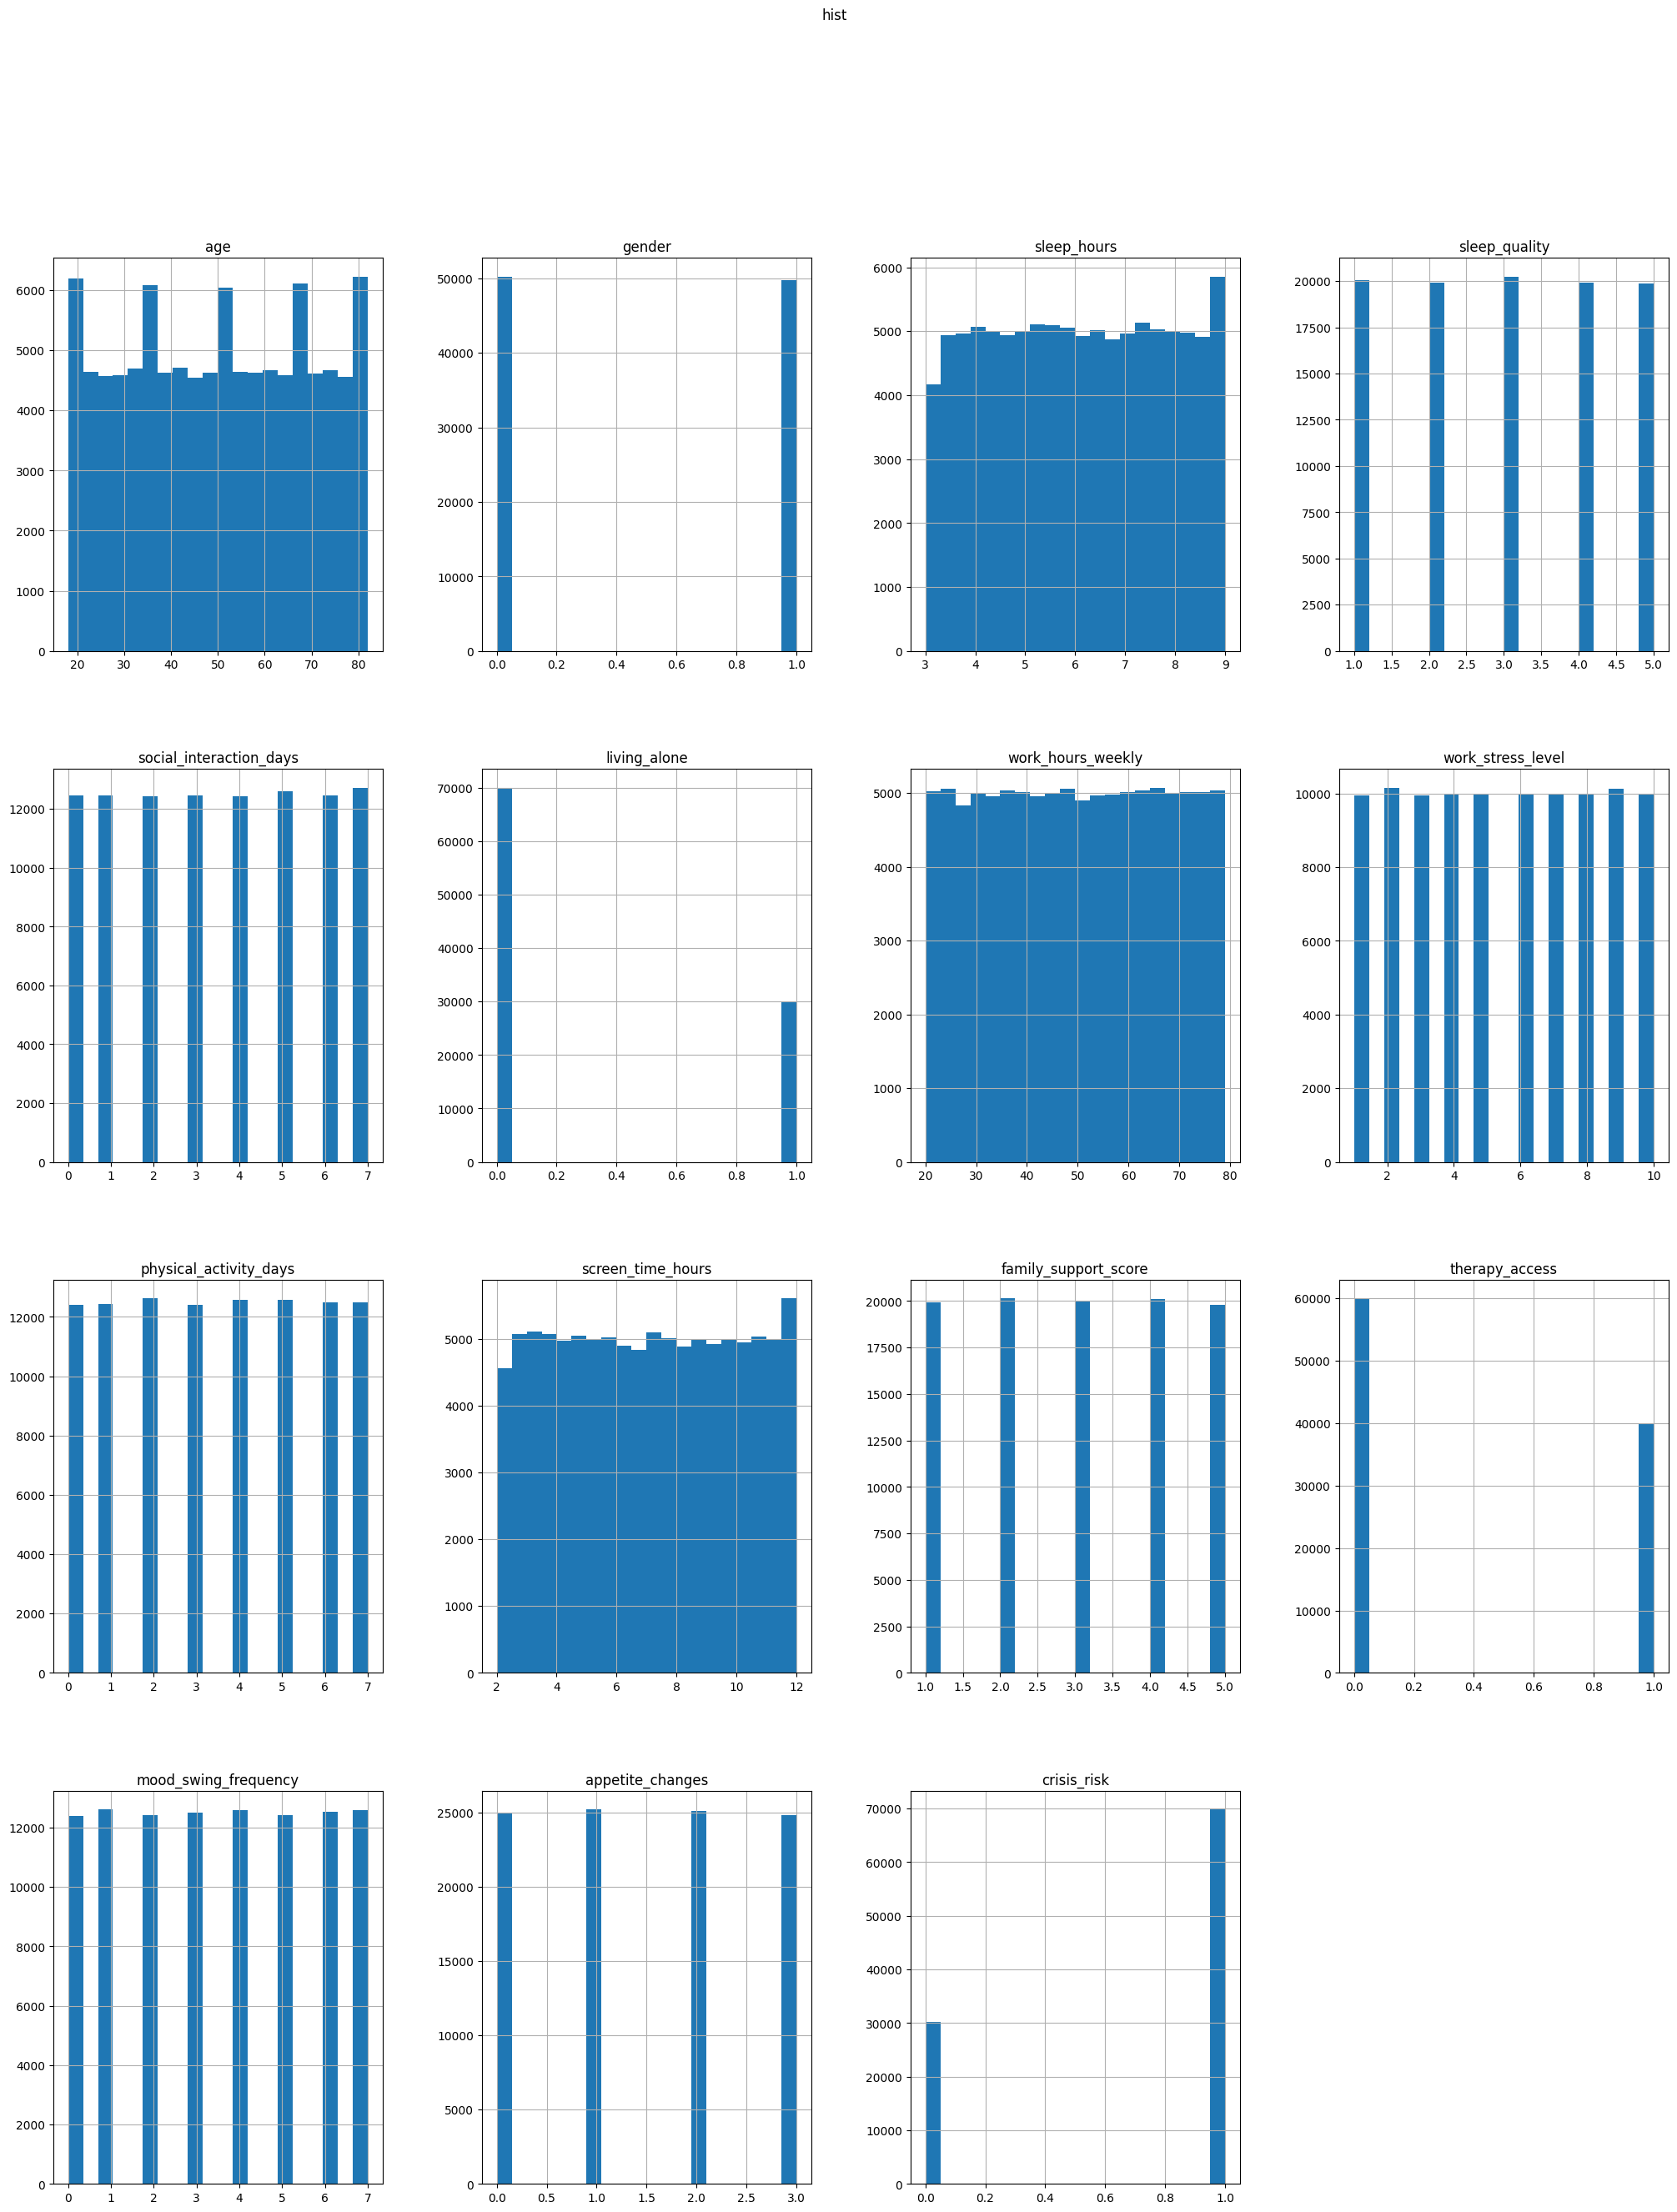

In [49]:
df.hist(bins=20,figsize=(25,30))
plt.suptitle("hist")
plt.show()


#### BoxPlot 

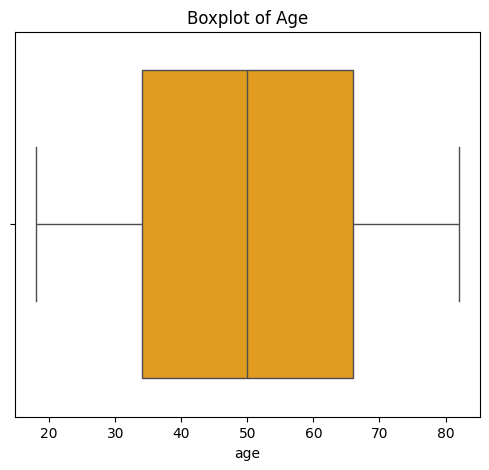

In [50]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df, x=df["age"],color="orange")
plt.title("Boxplot of Age")
plt.show()


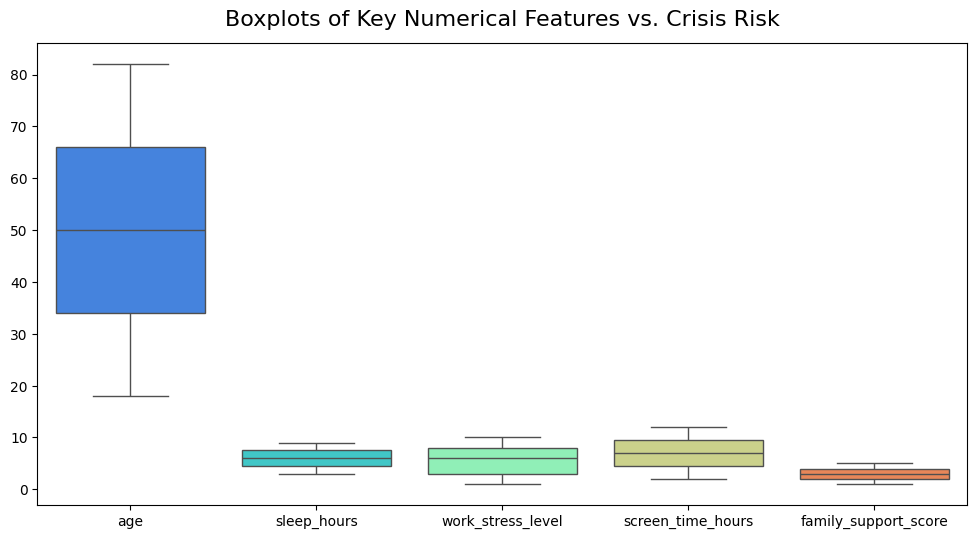

In [51]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['age', 'sleep_hours', 'work_stress_level', 'screen_time_hours', 'family_support_score']],palette="rainbow")
plt.title('Boxplots of Key Numerical Features vs. Crisis Risk', fontsize=16, y=1.02)
plt.show()


#### CountPlot

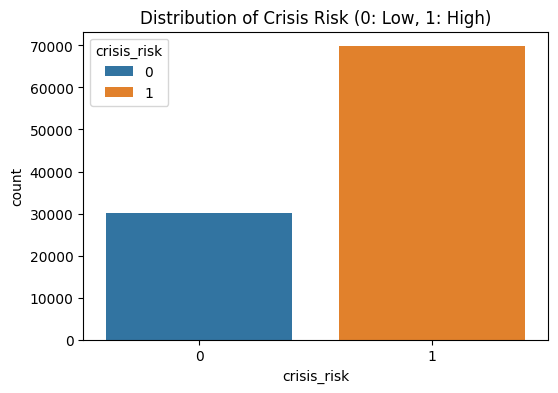

In [52]:
plt.figure(figsize=(6, 4))
sns.countplot(x='crisis_risk', data=df, hue="crisis_risk")
plt.title('Distribution of Crisis Risk (0: Low, 1: High)')
plt.show()

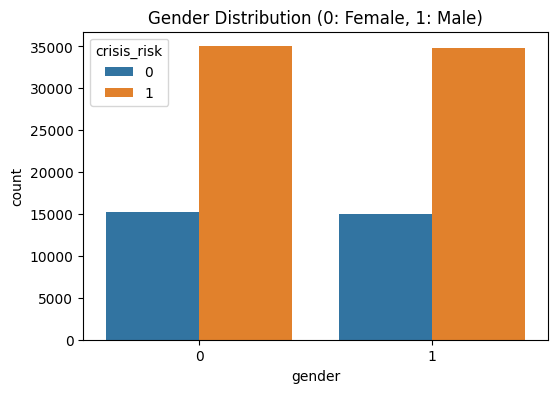

In [53]:
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df, hue="crisis_risk")
plt.title('Gender Distribution (0: Female, 1: Male)')
plt.show()

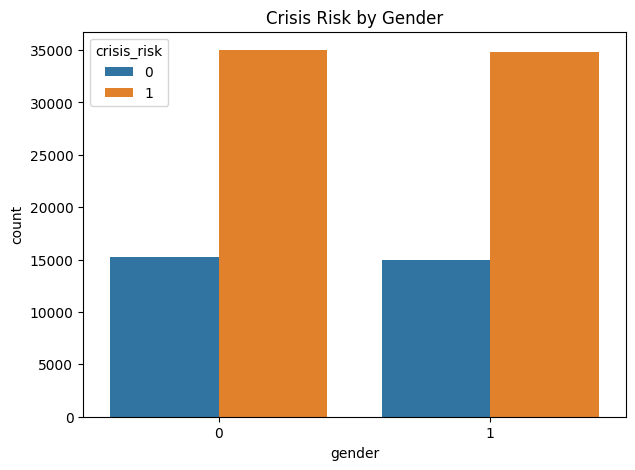

In [54]:
plt.figure(figsize=(7, 5))
sns.countplot(x='gender', data=df,hue="crisis_risk")
plt.title('Crisis Risk by Gender')
plt.show()

#### Checking Outliers 

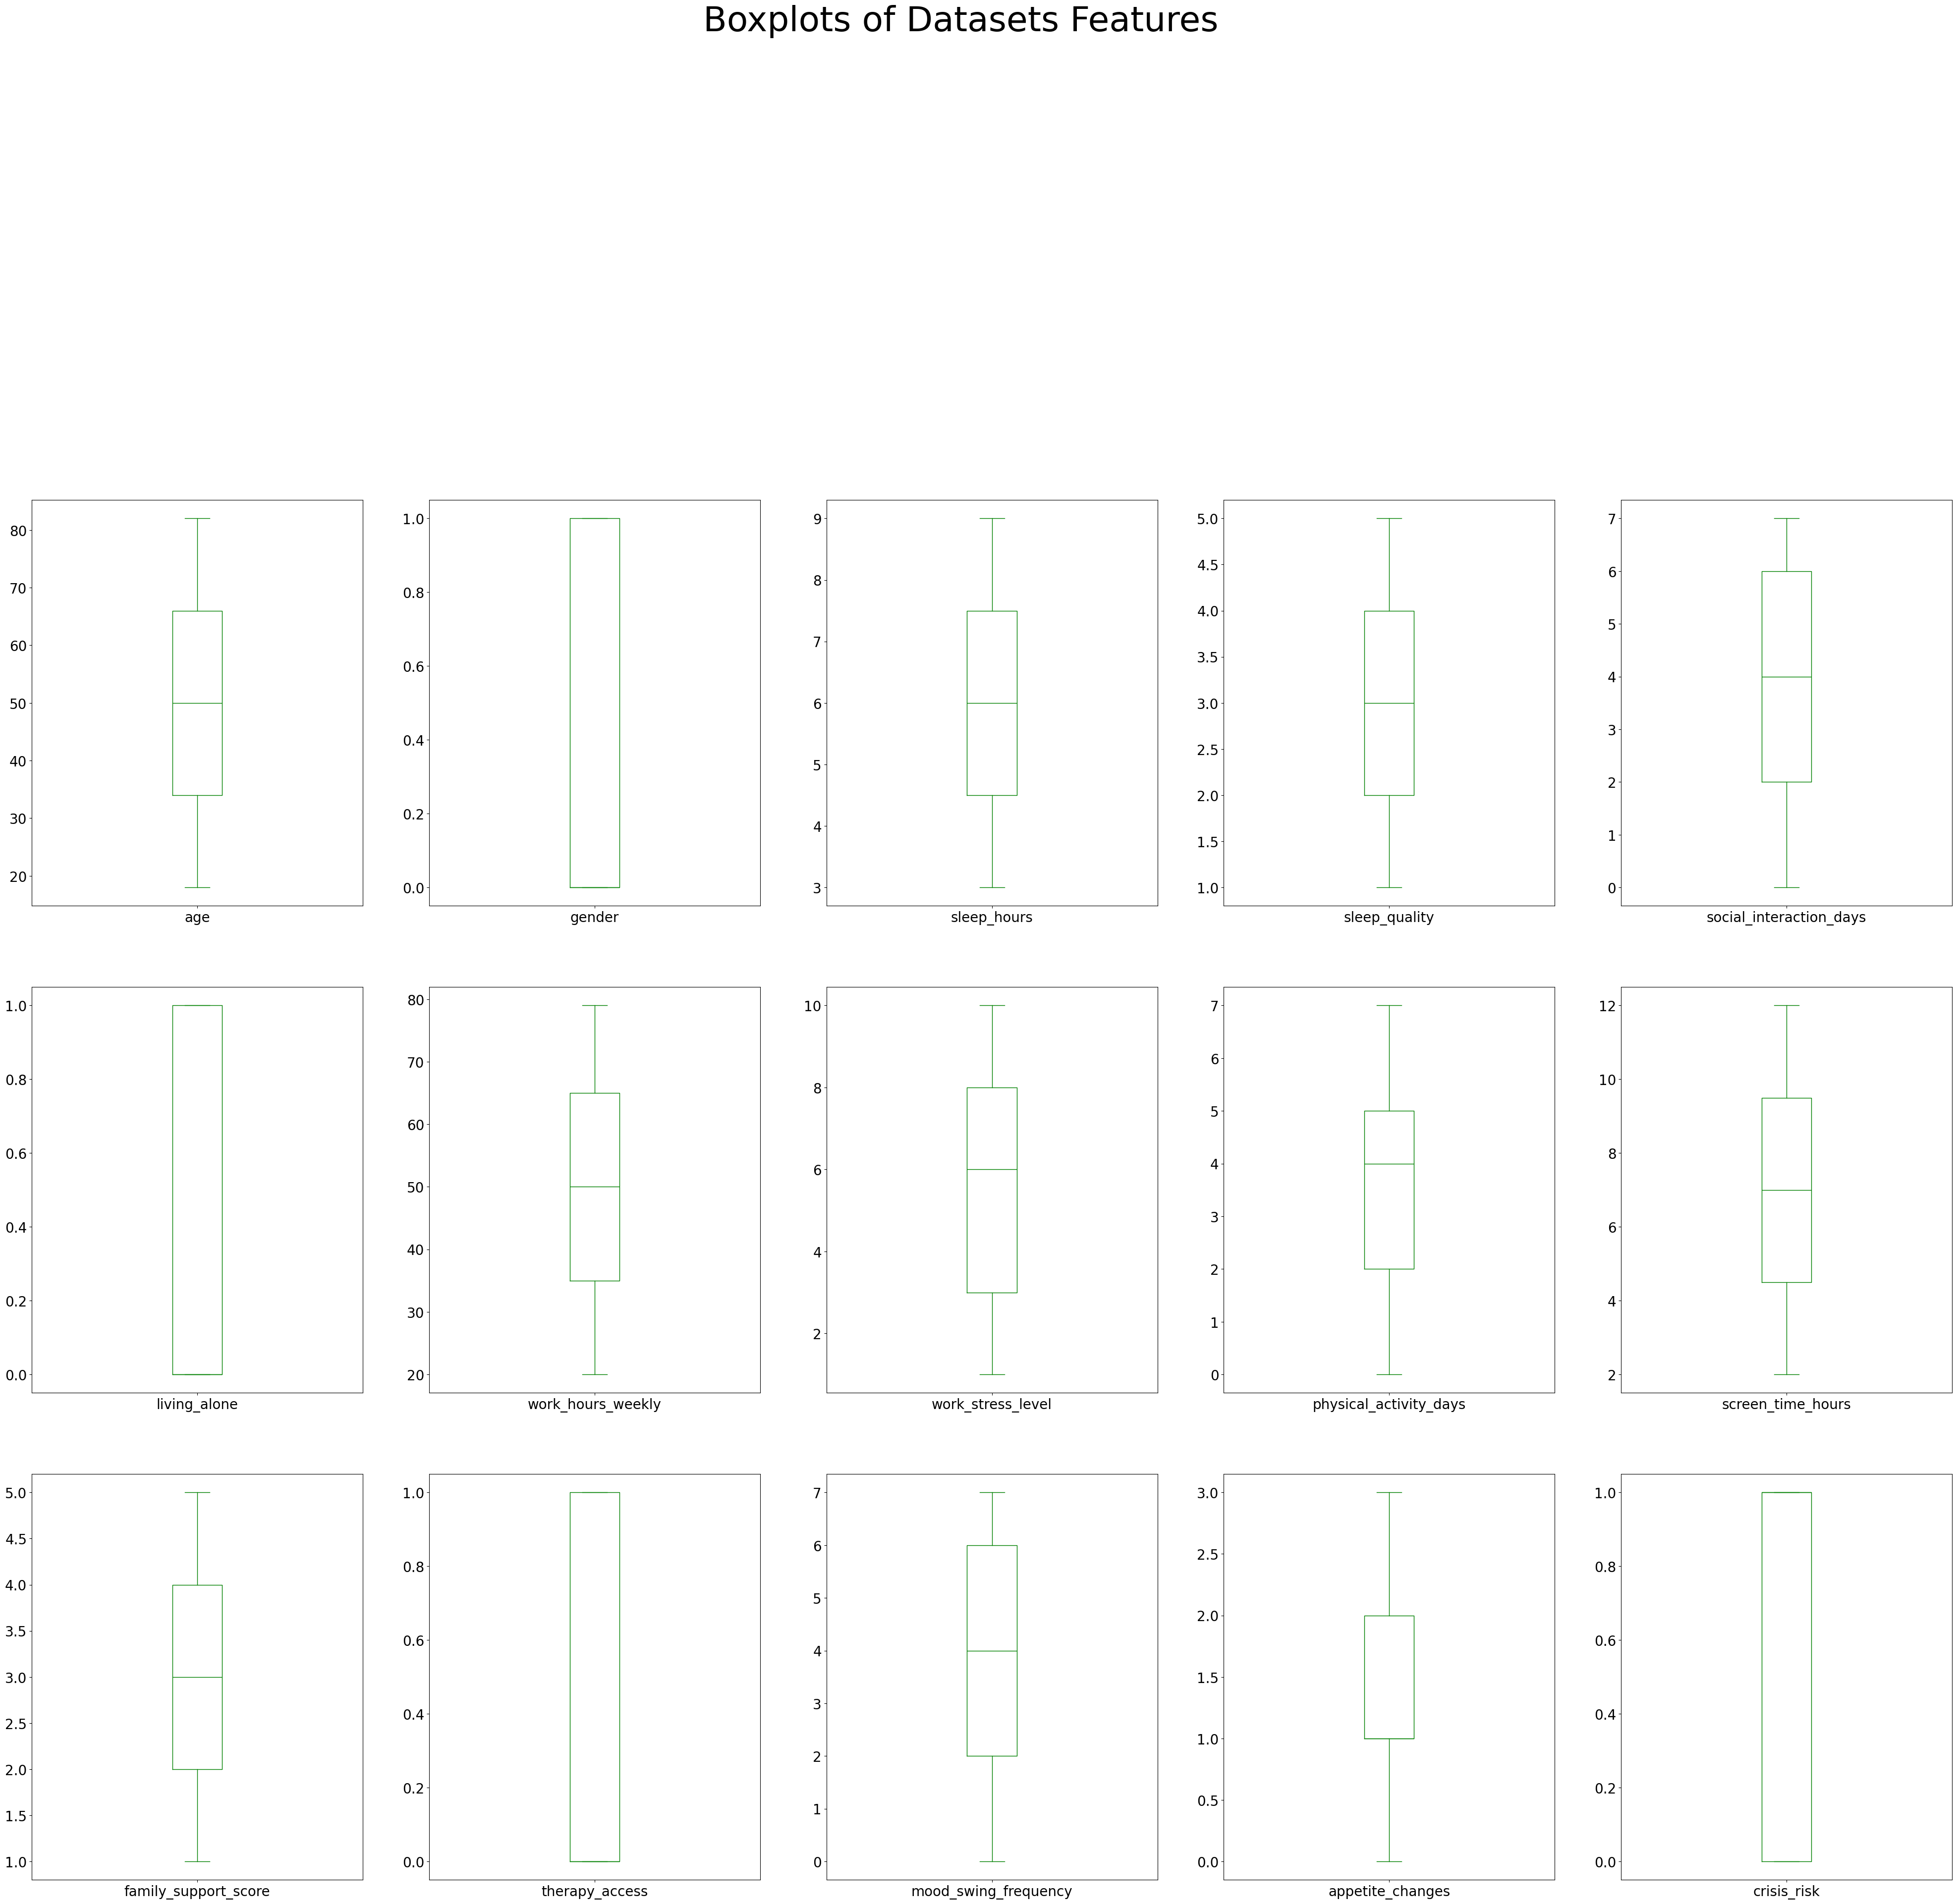

In [55]:
df.plot(kind="box", subplots=True, layout=(8,5), figsize=(50,100), color="green",fontsize=20)
plt.suptitle("Boxplots of Datasets Features", fontsize=50)
plt.show()

#### Correlation Heatmap

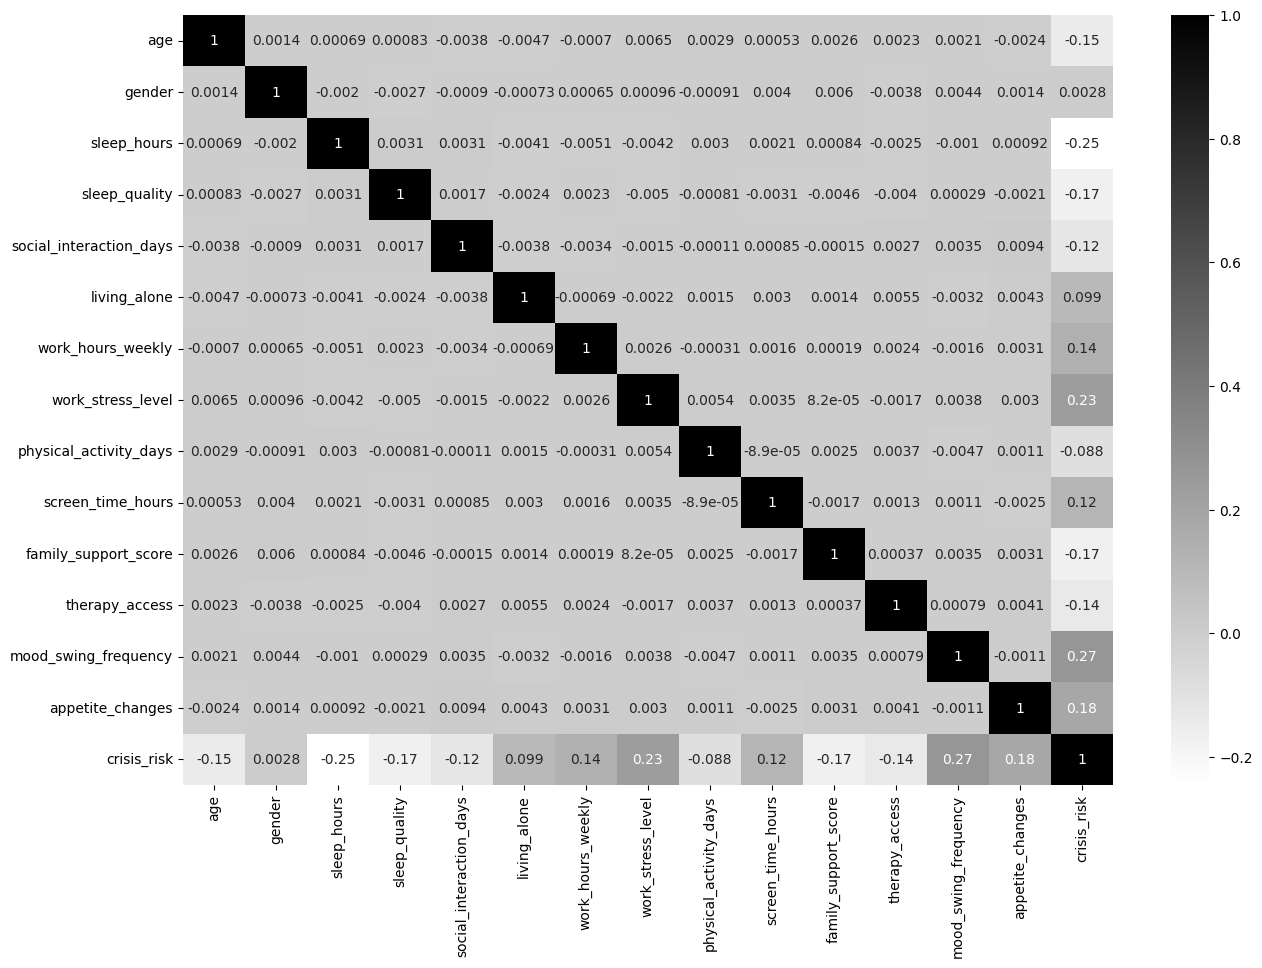

In [56]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap="gray_r")
plt.show()

In [57]:
df.drop(columns=["physical_activity_days"],inplace=True)

In [58]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
# Models 
# For algorithms 
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor, BaggingRegressor 
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# For classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn import model_selection
# from sklearn.utils import class_weight
# from sklearn.model_selection import KFold 
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB 

from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification
from sklearn import svm
from sklearn import tree 

##### Split x & y

In [60]:
x = df.drop("crisis_risk",axis=1)
y = df["crisis_risk"]

##### Train-test-split

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

##### Scaling (Logistic Regression needs scaling)

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [63]:
x_train

array([[-0.16226554,  1.00466086, -1.61755481, ..., -0.8166029 ,
         0.65410507, -1.34188648],
       [ 0.05077659,  1.00466086,  1.44389002, ..., -0.8166029 ,
        -1.52842769, -0.44525566],
       [-1.60029993,  1.00466086, -1.15544993, ..., -0.8166029 ,
         0.21759852,  1.34800598],
       ...,
       [-0.4285682 , -0.99536076,  0.92402203, ..., -0.8166029 ,
         0.21759852,  0.45137516],
       [-1.17421567, -0.99536076, -0.92439749, ...,  1.22458541,
        -1.52842769,  1.34800598],
       [-1.5470394 ,  1.00466086,  0.05757538, ..., -0.8166029 ,
         0.21759852, -1.34188648]], shape=(80000, 13))

In [64]:
x_test

array([[-1.65356046,  1.00466086, -1.32873926, ...,  1.22458541,
         0.65410507, -0.44525566],
       [-0.69487087,  1.00466086, -1.61755481, ..., -0.8166029 ,
        -0.21890804,  0.45137516],
       [-1.49377886, -0.99536076, -0.92439749, ..., -0.8166029 ,
        -0.65541459, -1.34188648],
       ...,
       [-0.16226554, -0.99536076,  1.15507447, ..., -0.8166029 ,
        -1.52842769, -0.44525566],
       [-0.80139193,  1.00466086, -1.61755481, ..., -0.8166029 ,
         1.52711817,  0.45137516],
       [-0.21552607,  1.00466086, -1.5597917 , ..., -0.8166029 ,
         0.65410507, -1.34188648]], shape=(20000, 13))

In [65]:
models = {
    "Linear_Regression" : LinearRegression(),
    "RandomForest_Regressor": RandomForestRegressor(),
    "GradientBoosting_Regressior": GradientBoostingRegressor(),
    "DecisionTree_Regressor": DecisionTreeRegressor(),
    "SVM": SVR(),

    #"MLP_Regressor": MLPRegressor(max_iter = 500),
    "AdaBoostRegressor": ExtraTreesRegressor(),
    "ExtraTreesRegressor": ExtraTreesRegressor(),
    "BagginRegressor": BaggingRegressor(),
    "LGBMRegressior": LGBMRegressor(),

    # "CatBoostRegressor": CatBoostRegressor(),
    "XGBRegressor": XGBRegressor()
}

In [67]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Dictionary to store results 
results = {"Model": [], "MSE": [], "MAE": [], "R^2": []}

# Loop through the models, train them, and calculate the metrices
for model_name, model in models.items():
    # Train the model 
    model.fit(x_train,y_train)

    # Make predictions 
    y_pred = model.predict(x_test)

    # Calculate metrices 
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)

    # Store results in the dictionary 
    results["Model"].append(model_name)
    results["MSE"].append(mse)
    results["MAE"].append(mae)
    results["R^2"].append(r2)

    # Convert results to a DataFrame 
results_df = pd.DataFrame(results)

    # Display the results 
results_df

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001009 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 13
[LightGBM] [Info] Start training from score 0.698163


c:\Users\Administrator\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


,Model,MSE,MAE,R^2
0,Linear_Regression,0.131251,0.304042,0.377530
1,RandomForest_Regressor,0.083002,0.162920,0.606355
2,GradientBoosting_Regressior,0.093510,0.247117,0.556521
3,DecisionTree_Regressor,0.156900,0.156900,0.255888
4,SVM,0.102972,0.216576,0.511646
5,AdaBoostRegressor,0.084653,0.181243,0.598528
6,ExtraTreesRegressor,0.084642,0.181638,0.598576
7,BagginRegressor,0.090917,0.163505,0.568816
8,LGBMRegressior,0.080471,0.201809,0.618357
9,XGBRegressor,0.083587,0.211029,0.603583


#### Logistic Regression 

In [43]:
from sklearn.linear_model import LogisticRegression
modl = LogisticRegression()
modl.fit(x_train,y_train)

LogisticRegression()

In [44]:
y_pred = modl.predict(x_test)

In [45]:
y_pred

array([1, 0, 0, ..., 0, 1, 1], shape=(20000,))

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score
print("Accuracy", accuracy_score(y_test,y_pred))
print("\nConfusion Matrix", confusion_matrix(y_test,y_pred))
print("\n Precision", precision_score(y_test,y_pred))
print("\nClassification Report:\n", classification_report(y_test,y_pred))

Accuracy 0.8267

Confusion Matrix [[ 3909  2134]
 [ 1332 12625]]

 Precision 0.855410258147571

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.65      0.69      6043
           1       0.86      0.90      0.88     13957

    accuracy                           0.83     20000
   macro avg       0.80      0.78      0.79     20000
weighted avg       0.82      0.83      0.82     20000



### RandomForestClassifier

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import train_test_split 

In [48]:
x = df.drop("crisis_risk",axis=1)
y = df["crisis_risk"]


In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [50]:
modl = RandomForestClassifier(n_estimators=11,max_depth=4,min_samples_split=2)
modl.fit(x_train,y_train)

RandomForestClassifier(max_depth=4, n_estimators=11)

In [51]:
ypred = modl.predict(x_test)

In [52]:
ypred

array([1, 1, 1, ..., 0, 1, 1], shape=(20000,))

In [53]:
import numpy as np

MAE = mean_absolute_error(y_test,ypred)
MSE = mean_squared_error(y_test, ypred)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test,ypred)

print(f"Mean Absolute Error (MAE):{MAE:,.2f}")
print(f"Mean Squared Error (MSE):{MSE:,.2f}")
print(f"Root Mean Squaered Error (RMSE):{RMSE:,.2f}")
print(f"R2 Score:{r2:,.2f}")

Mean Absolute Error (MAE):0.19
Mean Squared Error (MSE):0.19
Root Mean Squaered Error (RMSE):0.44
R2 Score:0.10


In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
rf = RandomForestClassifier(random_state=49)

In [ ]:
param_grid={
    'max_depth':[4,8,10,7,12,None],
    'min_samples_split':[5,3,8]
}

grid=GridSearchCV(RandomForestClassifier(random_state=42),param_grid,cv=3,scoring='neg_mean_absolute_error')
grid.fit(x_train,y_train)
# cv= means cross validation

print('Best Parameters:',grid.best_params_)
print('Best Accuracy:',grid.best_score_)
print("Best Model",grid.best_estimator_)

### XGboost

In [37]:
x = df.drop("crisis_risk",axis=1)
y = df["crisis_risk"]


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [39]:
pip install xgboost


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
from xgboost import XGBClassifier

model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
)
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [41]:
y_pred = model.predict(x_test)

In [42]:
from sklearn.metrics import precision_score,recall_score,r2_score,confusion_matrix,classification_report

print("Precision",precision_score(y_test,y_pred,average="weighted"))
print("Recall",recall_score(y_test,y_pred,average="weighted"))
print("r2_score",r2_score(y_test,y_pred))
print("confusion_matrix",confusion_matrix(y_test,y_pred))
print("classification_report",classification_report(y_test,y_pred))

Precision 0.8927655111978238
Recall 0.89385
r2_score 0.4965743759606037
confusion_matrix [[ 4836  1207]
 [  916 13041]]
classification_report               precision    recall  f1-score   support

           0       0.84      0.80      0.82      6043
           1       0.92      0.93      0.92     13957

    accuracy                           0.89     20000
   macro avg       0.88      0.87      0.87     20000
weighted avg       0.89      0.89      0.89     20000



In [43]:
import pickle 
from xgboost import XGBClassifier
 
c_model = XGBClassifier(random_state= 0, learning_rate= 0.45)
c_model.fit(x_train, y_train.values.ravel())
with open ("classification_model.pkl", "wb") as file:
    pickle.dump(c_model, file)

In [44]:
import joblib
joblib.dump(modl, "random_forest.pkl")


['random_forest.pkl']

In [45]:
import joblib
joblib.dump(model, "xgboost_model.pkl")


['xgboost_model.pkl']

In [46]:
with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)